# [CDAF] Atividade 3

## Nome e matrícula
Nome: Luís Felipe Ramos Ferreira
Matrícula: 2019022553

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_match_df.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [37]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
from socceraction import spadl
import matplotsoccer
from mplsoccer import Pitch, Sbopen, VerticalPitch
warnings.filterwarnings('ignore')

A partida escolhida será o jogo da La Liga entre Barcelona e Real Marid, no Camp Nou.

Link para os gols da partida: https://www.youtube.com/watch?v=SPQbewtlChg

In [16]:
BARCELONA_VS_REAL_MADRID_ID: int = 2565907
BARCELONA_ID: int = 676 # home team id
spain_df: pd.DataFrame = pd.read_json("../data/atv03/events/events_Spain.json")
match_df: pd.DataFrame = spain_df[spain_df["matchId"] == BARCELONA_VS_REAL_MADRID_ID]
players_df: pd.DataFrame = pd.read_json("../data/atv03/players/players.json", encoding="iso-8859-1")

In [17]:
match_df.rename(columns={"eventId": "type_id", "matchPeriod": "period_id", "subEventId": "subtype_id", "matchId": "game_id", "teamId": "team_id", "eventSec": "milliseconds", "playerId": "player_id", "id": "event_id"}, inplace=True)
match_df["period_id"] = pd.factorize(match_df["period_id"])[0] + 1
spadl_df: pd.DataFrame = spadl.wyscout.convert_to_actions(match_df, BARCELONA_ID)
spadl_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
0,2565907,1,0.003275,675,3321,52.50,33.32,66.15,27.20,249644096,0,0,1,0
1,2565907,1,0.005109,675,14723,66.15,27.20,73.50,15.64,249644097,0,0,1,1
2,2565907,1,0.007110,675,3306,73.50,15.64,77.70,38.76,249644098,0,0,1,2
3,2565907,1,0.008912,675,3309,77.70,38.76,96.60,27.20,249644099,0,0,1,3
4,2565907,1,0.011290,675,3915,96.60,27.20,93.45,9.52,249644100,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2565907,2,2.968944,676,222770,5.25,34.68,0.00,68.00,249646245,0,18,0,1440
1441,2565907,2,2.982540,675,4498,0.00,68.00,12.60,34.68,249646064,0,5,1,1441
1442,2565907,2,2.983745,675,3306,12.60,34.68,12.60,40.80,NaN,0,21,1,1442
1443,2565907,2,2.984949,675,3306,12.60,40.80,12.60,40.80,249646066,0,8,1,1443


In [18]:
# cleaning data to be compatible with matplotsoccer

spadl_df["result_name"] = spadl_df["result_id"].apply(lambda x: "success" if x == 1 else "failure")
spadl_df["team_name"] = spadl_df["team_id"].apply(lambda x: "Barcelona" if x == BARCELONA_ID else "Real Madrid")
spadl_df["player_name"] = spadl_df["player_id"].map(players_df.set_index("wyId")["firstName"] + " " + players_df.set_index("wyId")["lastName"])

actiontypes: list[str] = [
    'pass',
    'cross',
    'throw_in',
    'freekick_crossed',
    'freekick_short',
    'corner_crossed',
    'corner_short',
    'take_on',
    'foul',
    'tackle',
    'interception',
    'shot',
    'shot_penalty',
    'shot_freekick',
    'keeper_save',
    'keeper_claim',
    'keeper_punch',
    'keeper_pick_up',
    'clearance',
    'bad_touch',
    'non_action',
    'dribble',
    'goalkick',
]
spadl_df["type_name"] = spadl_df["type_id"].apply(lambda x: actiontypes[x])
spadl_df.rename(columns={"milliseconds": "time_seconds"})

spadl_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,result_name,team_name,player_name,type_name
0,2565907,1,0.003275,675,3321,52.50,33.32,66.15,27.20,249644096,0,0,1,0,success,Real Madrid,Karim Benzema,pass
1,2565907,1,0.005109,675,14723,66.15,27.20,73.50,15.64,249644097,0,0,1,1,success,Real Madrid,Toni Kroos,pass
2,2565907,1,0.007110,675,3306,73.50,15.64,77.70,38.76,249644098,0,0,1,2,success,Real Madrid,Sergio Ramos Garc\u00eda,pass
3,2565907,1,0.008912,675,3309,77.70,38.76,96.60,27.20,249644099,0,0,1,3,success,Real Madrid,Rapha\u00ebl Varane,pass
4,2565907,1,0.011290,675,3915,96.60,27.20,93.45,9.52,249644100,0,0,1,4,success,Real Madrid,Keylor Navas Gamboa,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2565907,2,2.968944,676,222770,5.25,34.68,0.00,68.00,249646245,0,18,0,1440,failure,Barcelona,N\u00e9lson Cabral Semedo,clearance
1441,2565907,2,2.982540,675,4498,0.00,68.00,12.60,34.68,249646064,0,5,1,1441,success,Real Madrid,Lucas V\u00e1zquez Iglesias,corner_crossed
1442,2565907,2,2.983745,675,3306,12.60,34.68,12.60,40.80,NaN,0,21,1,1442,success,Real Madrid,Sergio Ramos Garc\u00eda,dribble
1443,2565907,2,2.984949,675,3306,12.60,40.80,12.60,40.80,249646066,0,8,1,1443,success,Real Madrid,Sergio Ramos Garc\u00eda,foul


In [19]:
# cleaning up RAM
del spain_df
del players_df

## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.match_df [3].

As 5 ações escolhidas foram as 5 que resultaram no belo gol de Cristiano Ronaldo, após uma ótima jogada coletiva da equipe do Real Madrid.

In [20]:
RONALDO_GOAL_ID: int = 231
actions_df: pd.DataFrame = spadl_df[RONALDO_GOAL_ID - 4: RONALDO_GOAL_ID + 1].copy()
actions_df

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,result_name,team_name,player_name,type_name
227,2565907,1,0.829307,675,14723,69.30,29.92,13.65,17.00,249644259,0,21,0,227,failure,Real Madrid,Toni Kroos,dribble
228,2565907,1,0.838265,675,3322,14.70,17.00,10.50,15.64,249644264,0,0,1,228,success,Real Madrid,Cristiano Ronaldo dos Santos Aveiro,pass
229,2565907,1,0.839450,675,14723,10.50,15.64,3.15,40.12,249644265,0,1,1,229,success,Real Madrid,Toni Kroos,cross
230,2565907,1,0.841186,675,3321,3.15,40.12,1.05,34.68,249644267,1,0,1,230,success,Real Madrid,Karim Benzema,pass
231,2565907,1,0.842263,675,3322,1.05,34.68,0.00,34.00,249644266,0,11,1,231,success,Real Madrid,Cristiano Ronaldo dos Santos Aveiro,shot


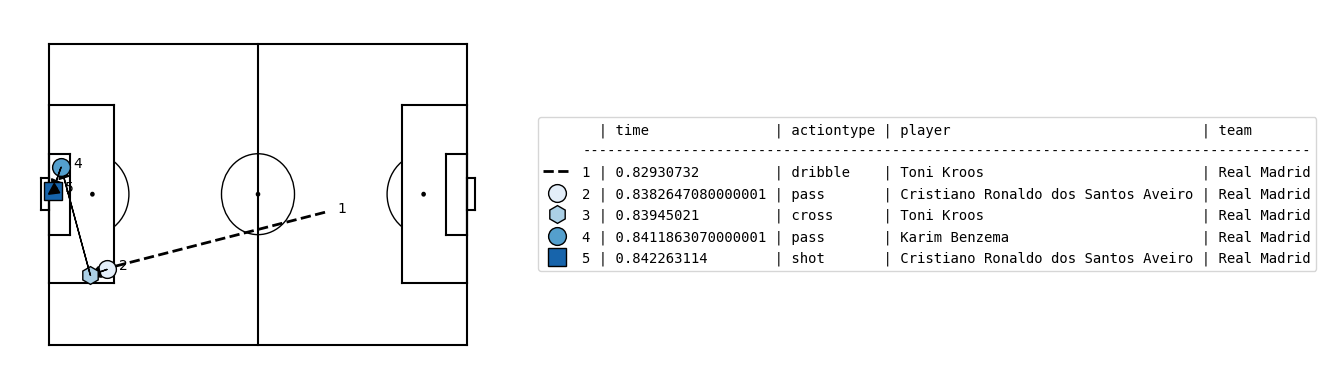

In [21]:
matplotsoccer.actions(
    location=actions_df[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions_df.type_name,
    team=actions_df.team_name,
    result=actions_df.result_name == "success",
    label=actions_df[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)

In [22]:
# cleaning up RAM
del actions_df

## Questão 3
- Visualize os chutes da partida, desenvolvendo seu código em cima do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time as melhores chances da partida? Por quê?

Para visualização dos chutes, optei por utilizar a função de plot do *pitch* da biblioteca *matplotsoccer* por se tratar de uma visualização mais agradável e detalhada de um campo. Algumas modificações foram feitas em relação ao código disponibilizado nas referências, mas a ideia geral foi mantida

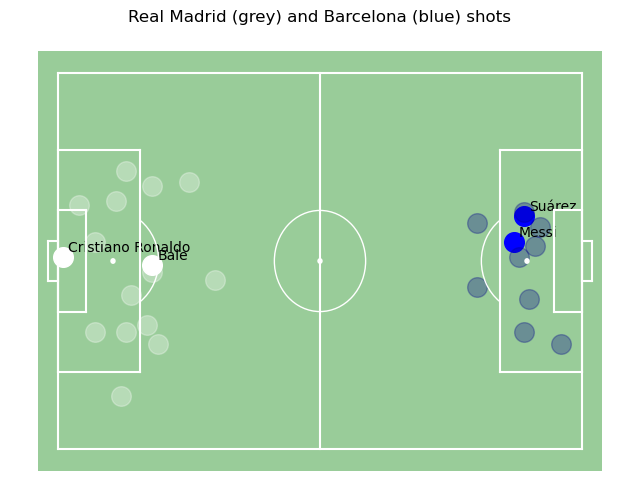

In [53]:
team1, team2 = spadl_df.team_name.unique()
shots: pd.DataFrame = spadl_df.loc[spadl_df["type_name"].isin(
    ['shot',
    'shot_penalty',
    'shot_freekick'])].copy()

matplotsoccer.field("green",figsize=8, show=False)

# to make a better visualization
goal_scorers_ids: dict[int: str] = {
    7972: "Suárez",
    3322: "Cristiano Ronaldo",
    3359: "Messi",
    8278: "Bale"
}

# matplotsoccer spec
pitch_x_length: int = 105
pitch_y_length: int = 68

for i, shot in shots.iterrows():

    x: float = shot["start_x"]
    y: float = shot["start_y"]
    goal = shot["result_name"] == "success"
    team_name = shot["team_name"]

    circle_size = 2

    if (team_name == team1):
        if goal:
            plt.scatter(x, y, s=200, c="white")
            plt.text(x + 1, y + 1, goal_scorers_ids[shot["player_id"]], fontsize=10)
        else:
            plt.scatter(x, y, s=200, c="white", alpha=.3)

    else:
        if goal:
            plt.scatter(x, y, s=200, c="blue")
            plt.text(x + 1, y + 1, goal_scorers_ids[shot["player_id"]])
        else:
            plt.scatter(x, y, s=200, c="darkblue", alpha=.3)

plt.title(f"{team1} (grey) and {team2} (blue) shots", fontsize = 12)
plt.show()

# duvida: plotar de onde foi o chute, sempre esquerda e direta?

Analisando apenas o número bruto de chutes, o Real Madrid teve 15 oportunidades, enquanto o Barcelona teve 10. Pode-se ver no entanto que os 10 chutes do Barcelona tiveram uma concentração bem grande na região central da grande área, enquanto o Real Madrid arriscou muitas vezes de fora da área e também de regições mais laterais da grande área.

Isso talvez possa refletir o estilo de jogo das equipes e suas principais formas de chegar ao gol. No entanto, considerando uma modelagem simples de *expected goals* em que os únicos parâmetros utilizados são a posição de onde o chute veio, nota-se que o Barcelona criou chances de maior qualidade, chegando mais perto do gol do adversário do que o Real Madrid.

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? O comportamento dele varia muito do ataque para a defesa?

In [24]:
MESSI_ID: int = 3359
messi_df: pd.DataFrame = spadl_df.query("player_id == @MESSI_ID").copy()
messi_df.head()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,result_name,team_name,player_name,type_name
23,2565907,1,0.085701,676,3359,77.70,8.84,84.00,6.12,249644574,0,0,1,23,success,Barcelona,Lionel Andres Messi Cuccittini,pass
27,2565907,1,0.092114,676,3359,70.35,8.84,45.15,19.72,249644578,0,0,1,27,success,Barcelona,Lionel Andres Messi Cuccittini,pass
36,2565907,1,0.117242,676,3359,60.90,23.12,78.75,14.96,249644587,0,0,1,36,success,Barcelona,Lionel Andres Messi Cuccittini,pass
38,2565907,1,0.122333,676,3359,68.25,22.44,66.15,42.16,NaN,0,21,1,38,success,Barcelona,Lionel Andres Messi Cuccittini,dribble
39,2565907,1,0.124687,676,3359,66.15,42.16,72.45,38.76,249644590,0,0,1,39,success,Barcelona,Lionel Andres Messi Cuccittini,pass


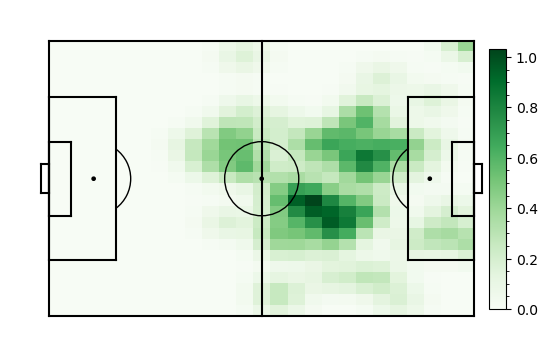

<Axes: >

In [51]:
# all actions heatmap
actions_heatmap = matplotsoccer.count(messi_df["start_x"], messi_df["start_y"], n=25, m=25)
actions_heatmap = scipy.ndimage.gaussian_filter(actions_heatmap, 1)
matplotsoccer.heatmap(actions_heatmap, cmap="Greens", cbar=True)

In [ ]:
# ofensive actions heatmap
messi__offensive_df: pd.DataFrame = messi_df.fil
offensive_actions_heatmap = 4

O comportamento do jogador Lionel Messi varia extremamente entre ações defensivas e ofensivas, uma vez que se trata de um atacante com grande qualidade ofensiva. Devido a isso, suas ações defensivas são quase ignoráveis.

Em relação ao seu comportamento, podemos ver que se trata de um jogador com posicionamento geral no lado direito do campo, que realiza movimentações e passes adentrando a área do adversário e movimentando a bola para o meio do campo.

Nota-se também que se trata de um jogador com bom desempenho na bola parada, principalmente escanteios, já que sua concentração de ações nos cantos de escanteio do campo é bem alta.

FALAR MAIS

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

Assim como na questão 3, realizei alguams modificações em relação ao código disponibilizado nas referências apenas para melhorar a visualização.

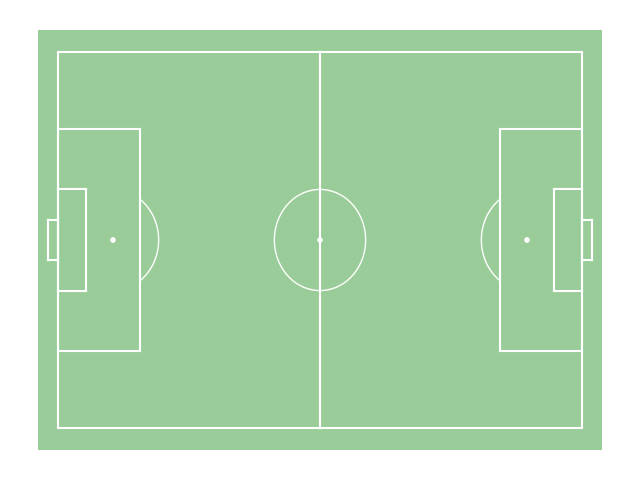

In [55]:
passes: pd.DataFrame = messi_df.loc[spadl_df["type_name"].isin(
    ['pass',
    'cross',
    'throw_in',
    'freekick_crossed',
    'freekick_short',
    'corner_crossed',
    'corner_short'])].copy()

matplotsoccer.field("green",figsize=8, show=False)

for i, thepass in passes.iterrows():
    x = thepass["start_x"]
    y = thepass["start_y"]
    
    plt.scatter(x, y, s=200, c="blue", alpha=.2)
    dx = thepass["end_x"] - x
    dy = thepass["end_y"] - y

    pass_arrow = plt.Arrow(x, y, dx, dy, width=3, color="blue")
    ax.add_patch(pass_arrow)
plt.title("Messi passes")
plt.show()


## Questão 6
- Crie uma rede de passes de cada uma das equipes, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?